In [203]:
# Import stuff
import numpy as n
import pandas as p
import seaborn as s
from matplotlib import pyplot as pp
import stats

s.set_theme(font_scale = 1.2, font = 'Times')

In [3]:
#read in file
adults = p.read_csv('data/adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

In [4]:
#make sure it works
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
#B) i)
per_25 = stats.quantile(adults['education-num'], 0.25)
per_50 = stats.quantile(adults['education-num'], 0.50)
per_75 = stats.quantile(adults['education-num'], 0.75)
per_99 = stats.quantile(adults['education-num'], 0.99)

print(f'==========================\nEducation-num Percentiles:\n==========================\n25th ~> {per_25}\n50th ~> {per_50}\n75th ~> {per_75}\n99th ~> {per_99}')

Education-num Percentiles:
25th ~> 9
50th ~> 10
75th ~> 12
99th ~> 16


Quartile Probability to make >$50K
Q1 ~> 0.0574
Q2 ~> 0.1721
Q3 ~> 0.2556
Q4 ~> 0.4846


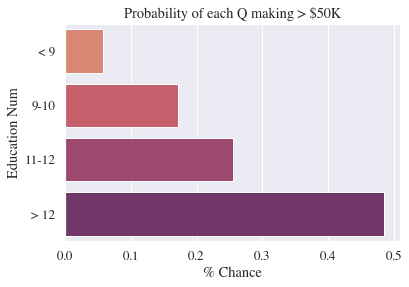

As you can see, higher levels of education result in a higher chance of making > $50k annually.


In [111]:
#B) ii)
#get the total number of adults from 0-25 (education-num < 9)
total_low = len(adults[['education-num','income']][(adults['education-num'] < per_25)])
#get the number of adults from 0-25 that make >50K
rich_low = len(adults[['education-num','income']][(adults['education-num'] < per_25) & (adults['income'] == '>50K')])
prob_rich_low = rich_low / total_low

#get the total number of adults from 26-50 (education-num == 9 or 10)
total_mid = len(adults[['education-num','income']][(adults['education-num'] == 9 )])
total_mid += len(adults[['education-num','income']][(adults['education-num'] == 10 )])
#get the number of adults from 26-50 that make >50K
rich_mid = len(adults[['education-num','income']][(adults['education-num'] == 9) & (adults['income'] == '>50K')])
rich_mid += len(adults[['education-num','income']][(adults['education-num'] == 10) & (adults['income'] == '>50K')])
prob_rich_mid = rich_mid / total_mid

#get the total number of adults from 51-75 (education-num == 11 or 12)
total_high = len(adults[['education-num','income']][(adults['education-num'] == 11 )])
total_high += len(adults[['education-num','income']][(adults['education-num'] == 12 )])
#get the number of adults from 51-75 that make >50K
rich_high = len(adults[['education-num','income']][(adults['education-num'] == 11) & (adults['income'] == '>50K')])
rich_high += len(adults[['education-num','income']][(adults['education-num'] == 12) & (adults['income'] == '>50K')])
prob_rich_high = rich_high / total_high

#get the total number of adults from 76-100 (education-num > 12)
total_max = len(adults[['education-num','income']][(adults['education-num'] > per_75)])
#get the number of adults from 76-100 that make >50K
rich_max = len(adults[['education-num','income']][(adults['education-num'] > per_75) & (adults['income'] == '>50K')])
prob_rich_max = rich_max / total_max


#graph them
ax = s.barplot(x = [prob_rich_low, prob_rich_mid, prob_rich_high, prob_rich_max], y = ['< 9', '9-10', '11-12', '> 12'], palette = 'flare')
ax.set(title = "Probability of each Q making > $50K")
ax.set(xlabel = "% Chance")
ax.set(ylabel = "Education Num")

#explain
print("==================================\nQuartile Probability to make >$50K\n==================================")
print(f'Q1 ~> {round(prob_rich_low, 4)}\nQ2 ~> {round(prob_rich_mid, 4)}\nQ3 ~> {round(prob_rich_high, 4)}\nQ4 ~> {round(prob_rich_max, 4)}')
pp.show()
print("As you can see, higher levels of education result in a higher chance of making > $50k annually.")

Generally speaking, the higher the education number, the greater probability of making > $50K.
Data for the graph given below.


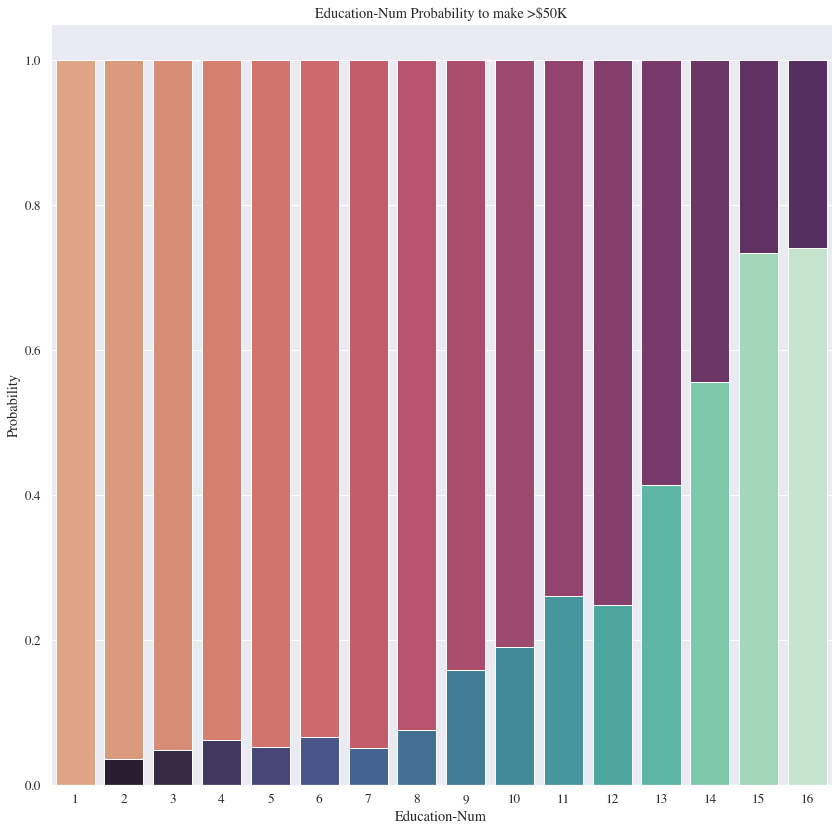

,education-num,prob_rich,prob_poor
0,16,0.740920,0.259080
1,15,0.734375,0.265625
2,14,0.556587,0.443413
3,13,0.414753,0.585247
4,11,0.261216,0.738784
5,12,0.248360,0.751640
6,10,0.190235,0.809765
7,9,0.159509,0.840491
8,8,0.076212,0.923788
9,6,0.066452,0.933548


In [242]:
#B iii)
#create smaller dataframe
ed_num = p.DataFrame()

ed_num['<=50K'] = adults[['education-num', 'income']][adults['income'] == '<=50K'].groupby('education-num').count()
ed_num['>50K'] = adults[['education-num', 'income']][adults['income'] == '>50K'].groupby('education-num').count()
ed_num['Total'] = adults[['education-num', 'income']].groupby('education-num').count()
ed_num = ed_num.fillna(0) #fill NaN with zeros

#get probabilities of each
ed_num['prob_rich'] = ed_num['>50K'] / ed_num['Total']
ed_num['prob_poor'] = ed_num['<=50K'] / ed_num['Total']
ed_num['prob_total'] = ed_num['Total'] / ed_num['Total']

"""
plotting/explaination section
"""
pp.figure(figsize = (14,14))

#plot prob_total
ax2 = ed_num[['prob_rich', 'prob_poor', 'prob_total']].sort_values('prob_rich', ascending = False).reset_index()
s.barplot(x = ax2['education-num'], y = ax2['prob_total'], palette = 'flare')

#plot prob_rich
s.barplot(x = ax2['education-num'], y = ax2['prob_rich'], palette = 'mako')

#make pretty
pp.title("Education-Num Probability to make >$50K")
pp.xlabel("Education-Num")
pp.ylabel("Probability")

print("Generally speaking, the higher the education number, the greater probability of making > $50K.")
print("Data for the graph given below.")
pp.show()
ax2[['education-num', 'prob_rich', 'prob_poor']]

In [ ]:
# B) iv)

